In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

max_features = 10000  # Liczba słów w słowniku
maxlen = 500          # Maksymalna dł. sekwencji
no_of_epochs = 5
batch_size = 128
split=0.3

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Przygotowanie danych wejściowych
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [11]:
# Model RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32, input_length=maxlen))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

history_rnn = model_rnn.fit(x_train, y_train, epochs=no_of_epochs, batch_size=batch_size, validation_split=split)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 32s 221ms/step - loss: 0.6476 - accuracy: 0.6125 - val_loss: 0.5513 - val_accuracy: 0.7429
Epoch 2/5
137/137 [==============================] - 34s 248ms/step - loss: 0.4292 - accuracy: 0.8159 - val_loss: 0.3687 - val_accuracy: 0

In [13]:
# Model LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs=no_of_epochs, batch_size=batch_size, validation_split=split)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 63s 445ms/step - loss: 0.6005 - accuracy: 0.6603 - val_loss: 0.4714 - val_accuracy: 0.7947
Epoch 2/5
137/137 [==============================] - 63s 461ms/step - loss: 0.3671 - accuracy: 0.8472 - val_loss: 0.3288 - val_accuracy: 0

In [14]:
# Dwukierunkowy model LSTM (BRNN)
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 32, input_length=maxlen))
model_bilstm.add(Bidirectional(LSTM(32)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=no_of_epochs, batch_size=batch_size, validation_split=split)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 125s 884ms/step - loss: 0.6640 - accuracy: 0.5900 - val_loss: 0.5317 - val_accuracy: 0.7759
Epoch 2/5
137/137 [==============================] - 121s 888ms/step - 

In [15]:
# Głęboki model LSTM (DRNN)
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_deep_lstm.add(LSTM(32, return_sequences=True))
model_deep_lstm.add(LSTM(32))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_deep_lstm.summary()

history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=no_of_epochs, batch_size=batch_size, validation_split=split)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_3 (LSTM)               (None, 500, 32)           8320      
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 129s 906ms/step - loss: 0.6424 - accuracy: 0.5995 - val_loss: 0.5694 - val_accuracy: 0.6973
Epoch

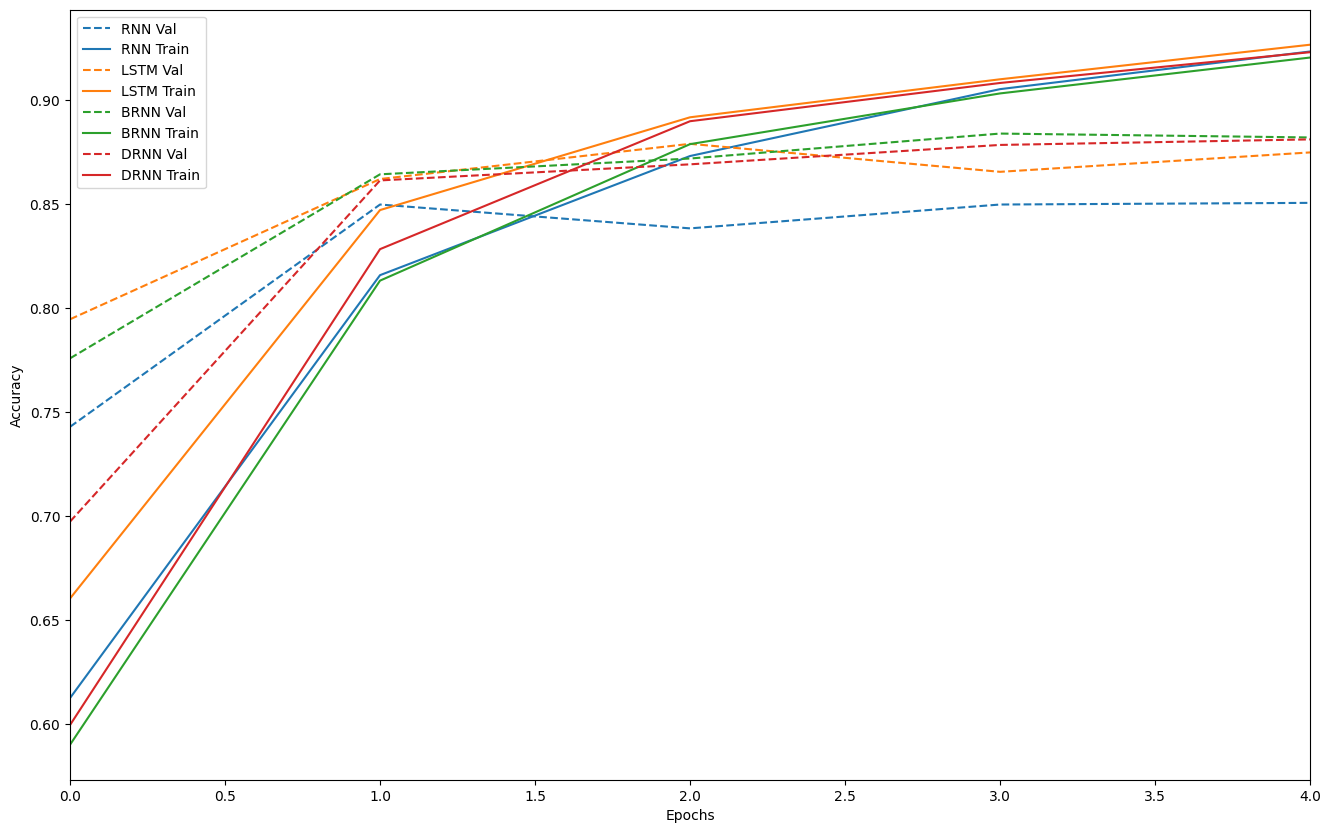

In [19]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.show()

plot_history([('RNN', history_rnn), ('LSTM', history_lstm), ('BRNN', history_bilstm), ('DRNN', history_deep_lstm)])
